# Exercice 1 : Calcul du BER d'une QAM-4

In [1]:
import numpy as np
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt

In [2]:
def rand(N):
    """
    Crée un vecteur de N valeurs aléatoires valant soit -1, soit 1.
    """
    x = np.random.randint(2, size=N)  # Soit 0, soit 1
    x *= 2  # Soit 0, soit 2
    return x - 1  # Soit -1, soit 1


def randn(N, s=1):
    """
    Crée un vecteur de N valeurs aléatoires centrées en 0 et de variance s.
    """
    return np.random.randn(N) * np.sqrt(s)


def complex2real(z):
    """
    Convertit un vecteur de nombres complexes en un vecteur de 2 nombres réels (partie réelle et imag.).
    """
    real = np.real(z)
    imag = np.imag(z)
    return np.column_stack([real, imag])


def real2complex(x):
    """
    Fonction inverse de la fonction complex2real.
    """
    real, imag = x.T
    return real + 1j * imag


def closest_symbols(y):
    """
    Retournes x_hat en fonction de y, à savoir le symbole le plus proche dans la constellation.
    """
    symbols = np.array([1 + 1j, 1 - 1j, -1 + 1j, -1 - 1j])

    # Comme la fonction distance_matrix fonctionne avec des nombres réels,
    # on transforme le vecteur de nombres complexes en vecteur de 2 nombres réels

    symbols = complex2real(symbols)
    y = complex2real(y)

    distances = distance_matrix(y, symbols)
    # On récupère, pour chaque point, l'indice du symbole le plus proche
    closest_indices = np.argmin(distances, axis=1)

    return real2complex(symbols[closest_indices])


def ber(x, x_hat):
    """
    Calcule le BER entre x et x_hat (son estimation).
    """
    errors = x != x_hat

    return np.sum(errors) / len(x)


def plot_constellation(x, symbol="x"):
    plt.figure(figsize=(6, 6))
    plt.scatter(np.real(x), np.imag(x))
    plt.xlabel(r"$\Re({x})$".format(x=symbol))
    plt.ylabel(r"$\Im({x})$".format(x=symbol))
    plt.axis("equal")


def plot_snr_vs_ber(SNR, BER):
    plt.figure(figsize=(6, 6))
    plt.semilogy(10 * np.log10(SNR), BER)
    plt.xlabel("SNR (dB)")
    plt.ylabel("BER")

## 1.1

In [3]:
N = int(1e6)  # Par défaut, la notation 1eX = 10^X crée un nombre à virgule


x = rand(N) + 1j * rand(N)

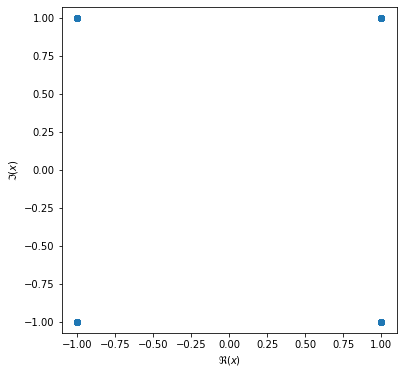

In [4]:
# Les points sont situés sur l'un des 4 coins
plot_constellation(x)

## 1.2

In [5]:
s = 1e-2

n = randn(N, s / 2) + 1j * randn(N, s / 2)

## 1.3

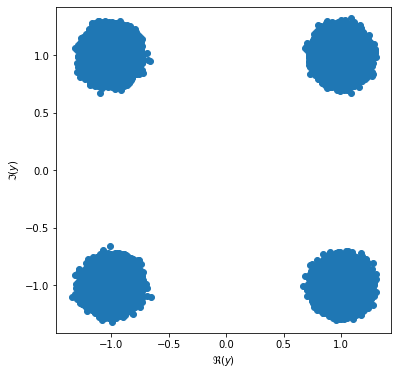

In [6]:
y = x + n

plot_constellation(y, symbol="y")

## 1.4

In [7]:
x_hat = closest_symbols(y)
x_hat

array([ 1.+1.j, -1.-1.j, -1.-1.j, ...,  1.-1.j,  1.+1.j, -1.-1.j])

## 1.5

In [8]:
ber(x, x_hat)

0.0

## 1.6

In [9]:
BER = []
SNR = []

for s in np.logspace(-2, 1, 25):

    n = randn(N, s / 2) + 1j * randn(N, s / 2)

    y = x + n

    x_hat = closest_symbols(y)

    snr = 2 / s
    SNR.append(snr)
    BER.append(ber(x, x_hat))

## 1.7

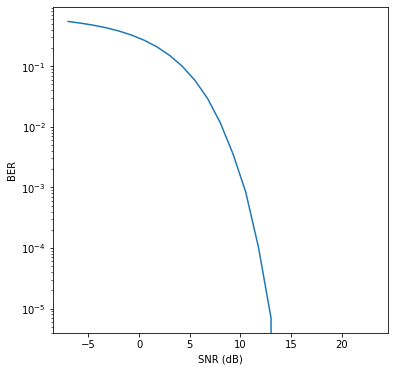

In [10]:
plot_snr_vs_ber(SNR, BER)

# On a bien un résultat similaire à https://www.raymaps.com/index.php/qam-theoretical-ber/

# Exercice 2 : DCT

In [11]:
import numpy as np
from scipy.fftpack import dct, idct


def dct2(X):
    return dct(dct(X.T, norm="ortho").T, norm="ortho")


def idct2(Y):
    return idct(idct(Y.T, norm="ortho").T, norm="ortho")


blocks = np.load("seance4.npy", allow_pickle=True).item()

In [12]:
import matplotlib.pyplot as plt


def plot_image(X, ax=None):
    if ax is None:  # Si on ne fournit pas d'axes, on en crée
        _, ax = plt.subplots()

    im = ax.imshow(X, origin="lower")
    bar = plt.colorbar(im, ax=ax)

    ax.set_xlabel("m / u")
    ax.set_ylabel("n / v")
    bar.set_label("Valeur pixel")

## 2.1 & 2.2

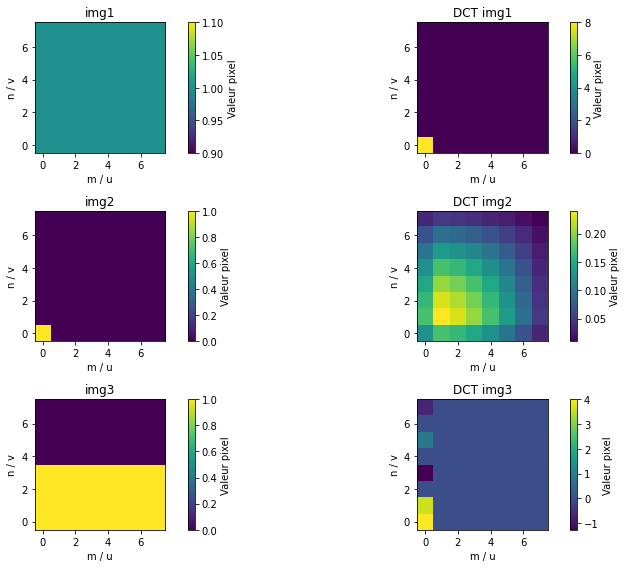

In [13]:
fig, ax = plt.subplots(3, 2, figsize=(12, 8))

for i, img in enumerate(["img1", "img2", "img3"]):
    X = blocks[img]
    Y = dct2(X)
    plot_image(X, ax[i][0])
    plot_image(Y, ax[i][1])
    ax[i][0].set_title(img)
    ax[i][1].set_title("DCT " + img)
    
fig.tight_layout()

## 2.3

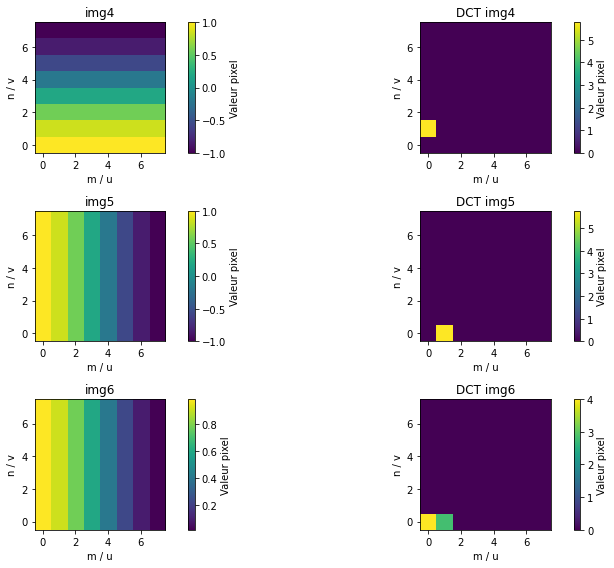

In [14]:
fig, ax = plt.subplots(3, 2, figsize=(12, 8))

for i, img in enumerate(["img4", "img5", "img6"]):
    X = blocks[img]
    Y = dct2(X)
    plot_image(X, ax[i][0])
    plot_image(Y, ax[i][1])
    ax[i][0].set_title(img)
    ax[i][1].set_title("DCT " + img)
    
fig.tight_layout()

## 2.4

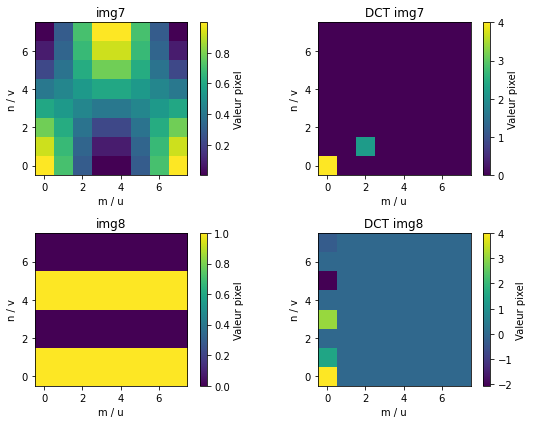

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(8, 6))

for i, img in enumerate(["img7", "img8"]):
    X = blocks[img]
    Y = dct2(X)
    plot_image(X, ax[i][0])
    plot_image(Y, ax[i][1])
    ax[i][0].set_title(img)
    ax[i][1].set_title("DCT " + img)
    
fig.tight_layout()

## 2.5

DCT img3
[[ 4.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 3.625  0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.   ]
 [-1.273  0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.85   0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.   ]
 [-0.721  0.     0.     0.     0.     0.     0.     0.   ]]
DCT img9
[[ 4.     0.     0.     0.     0.     0.     0.     0.   ]
 [-3.625  0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 1.273  0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.   ]
 [-0.85   0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.721  0.     0.     0.     0.     0.     0.     0.   ]]


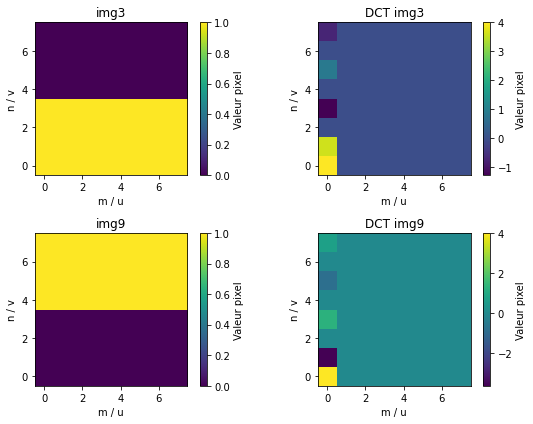

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(8, 6))

for i, img in enumerate(["img3", "img9"]):
    X = blocks[img]
    Y = dct2(X)
    with np.printoptions(precision=3, suppress=True):
        print("DCT " + img)
        print(Y)
    plot_image(X, ax[i][0])
    plot_image(Y, ax[i][1])
    ax[i][0].set_title(img)
    ax[i][1].set_title("DCT " + img)
    
fig.tight_layout()

## 2.6

Y quantifié :
[[ 56.  -6. -28.   6.   5.   0.   0.  -2.]
 [-55.  -0.  -3.   2.   0.  -0.  -0.  -1.]
 [  3.   5.  16.  -5.  -2.   0.   0.   2.]
 [ -2.   1.   6.  -0.  -1.   0.  -0.   1.]
 [ -7.  -1.  -2.   0.   0.  -0.   0.  -0.]
 [  4.   0.  -0.   0.   0.   0.   0.  -0.]
 [  2.  -0.  -0.  -0.  -0.   0.  -0.  -1.]
 [ -0.  -0.  -1.   0.   1.  -0.   0.  -0.]]


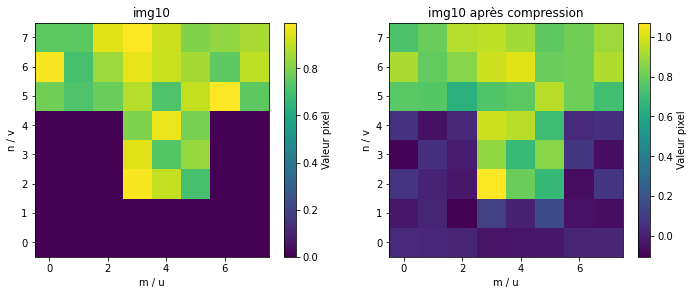

In [17]:
# (a)
Q2 = blocks["Q"] / 256

X = blocks["img10"]
Y = dct2(X)

# (b)
Y_Q = np.round(Y / Q2)

print("Y quantifié :")
print(Y_Q)

# (c)
Y_hat = Y_Q * Q2

# (d)
X_hat = idct2(Y_hat)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

plot_image(X, ax[0])
plot_image(X_hat, ax[1])
ax[0].set_title("img10")
ax[1].set_title("img10 après compression")
    
fig.tight_layout()